# Material de aula - Redes Neurais e Deep Learning

In [ ]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados


## <center> Perceptron Multicamadas e Classificação de Padrões - LABORATÓRIO 03 </center>

### A padronização para a saída, representando o conservante a ser aplicado, ficou definida da seguinte forma:

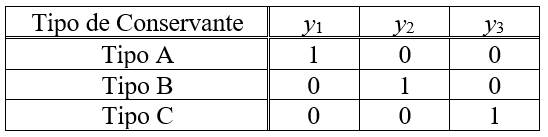

In [1]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [3]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''    
    return 1/(1+np.exp(-z))

In [4]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''        
    return np.tanh(z)

# 1 - Implementação do algoritmo de treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, complete o código para construir as funções de treinamento do MLP.

## 1.1 - Ajuste o código que realiza o forward step do MLP

In [7]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]

    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## COMPLETE O PASSO DE CALCULO DA SAIDA (UTILIZANDO FUNÇÃO SIGMOIDE, POIS AGORA SERÁ APLICADA A CLASSIFICAÇÃO DE PADRÕES)
 

    #IMPLEMENTE O CÓDIGO AQUI - FIM
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [6]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2
    E_k = np.sum(E_k, axis=1)
    MSE = np.sum(E_k) / nSamples
    
    return np.asscalar(MSE)

## 1.2 - Ajuste o código que realiza o treinamento em BATCH

In [8]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       

        #INICIO - BACKWARD STEP
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA

        #A derivada de g2 é igual a Y_2 * (1 - Y_2)
        diff_g2 = Y_2 * (1 - Y_2)
        #gradiente local
        delta_2 = (vOutputs - Y_2) * diff_g2
        
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2
        
        W_2 += eta * delta_2 @ Y_1.T
        B_2 += eta * np.sum(delta_2, axis=1, keepdims=True)
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        diff_g1 = Y_1 * (1 - Y_1)

        #Gradiente local
        delta_1 = (W_2.T @ delta_2) * diff_g1
        
        #Ajuste dos pesos
        W_1 += eta * delta_1 @ Y_0.T
        B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.3 - Ajuste o código que realiza o treinamento ONLINE

In [18]:
#CÉLULA MLP-LIB-08
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE    
    
        #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples):
            Y_0 = vInputs[:, [k]] #esta atribuição é apenas para manter uniformidade de nomenclatura
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])       

            #INICIO - BACKWARD STEP
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA

            #A derivada de g2 é igual a Y_2 * (1 - Y_2)
            diff_g2 = Y_2 * (1 - Y_2)
            #gradiente local
            Y_d = vOutputs[:, [k]]
            delta_2 = (Y_d - Y_2) * diff_g2

            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            #AJUSTE OS VALORES DE W_2 E B_2

            W_2 += eta * delta_2 @ Y_1.T
            B_2 += eta * np.sum(delta_2, axis=1, keepdims=True)
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)

            #Gradiente local
            delta_1 = (W_2.T @ delta_2) * diff_g1

            #Ajuste dos pesos
            W_1 += eta * delta_1 @ Y_0.T
            B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

In [9]:
#CÉLULA MLP-LIB-09
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)    
    return (Y_2)

# 2 - Implementação e testes do modelo da Rede MLP

### No processamento de bebidas, a aplicação de um determinado conservante é efetuada em função da combinação de 04 variáveis reais, definidas por x1 (teor de água), x2 (grau de acidez), x3 (temperatura) e x4 (tensão superficial). 

### Sabe-se que existem apenas três tipos de conservantes que podem ser aplicados, os quais são categorizados por tipo A, B e C. A partir destas variáveis, realizam-se ensaios em laboratório para especificar que tipo de conservante deve ser aplicado em determinada bebida.

### Por intermédio de 148 desses ensaios experimentais, a equipe de engenheiros e cientistas resolveu aplicar uma rede perceptron multicamadas como classificadora de padrões, a fim de que esta identifique qual conservante será aplicado em determinado lote de bebida. Por questões operacionais da própria linha de produção, utilizar-se-á aqui uma rede perceptron com três saídas, conforme apresentado na figura abaixo.

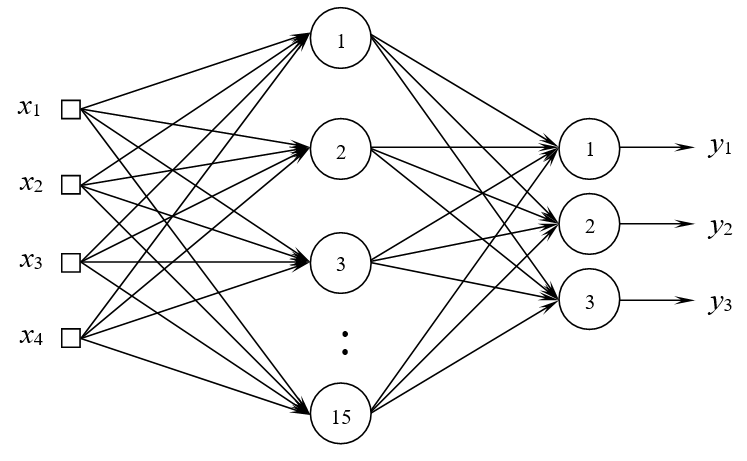


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

## MLP - inicio

# 2.1 - Configuração dos hiperparâmetros

In [10]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta        = 0.01
epsilon    = 0.0000005
nInputs    = 4
nHidden    = 15
nOutputs   = 3
max_epochs = 10000
dictLayers = {'nLayers' : 2, 'vLayers' : np.array([nInputs, nHidden, nOutputs])}

# 2.2 - Carga dos dados e execução do treinamento

In [36]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA

#Carrega dados - Treino
dfTrainingFile = loadDataFile('Lab02_training.csv')
# dfTrainingFile.drop(columns=('Amostra'), inplace=True)

nSamples = len(dfTrainingFile['x1'])

vInputs = np.array(dfTrainingFile[['x1','x2','x3','x4']])
vOutputs = np.array(dfTrainingFile[['d1','d2','d3']])

(W_1, W_2, B_1, B_2, MSE) = mlp_train_online(eta, epsilon, vInputs.T, vOutputs.T, dictLayers, max_epochs)
print(W_1)
print('-------------')
print(W_2)



Epoch = 0 - MSE = 0.9919303935134763
Epoch = 1 - MSE = 0.9914107814354985
Epoch = 2 - MSE = 0.9908066407912481
Epoch = 3 - MSE = 0.9900949451087618
Epoch = 4 - MSE = 0.9892435321342676
Epoch = 5 - MSE = 0.9882061400473608
Epoch = 6 - MSE = 0.9869138683200893
Epoch = 7 - MSE = 0.985259709771121
Epoch = 8 - MSE = 0.9830687411166767
Epoch = 9 - MSE = 0.9800361792146721
Epoch = 10 - MSE = 0.9755861679327794
Epoch = 11 - MSE = 0.9685111233374456
Epoch = 12 - MSE = 0.9559223519920678
Epoch = 13 - MSE = 0.9299381530808873
Epoch = 14 - MSE = 0.8726898949892321
Epoch = 15 - MSE = 0.8047704813862772
Epoch = 16 - MSE = 0.7818132390745989
Epoch = 17 - MSE = 0.7770218580841505
Epoch = 18 - MSE = 0.7757968993447323
Epoch = 19 - MSE = 0.775348618259469
Epoch = 20 - MSE = 0.7751015634697603
Epoch = 21 - MSE = 0.7749146331253285
Epoch = 22 - MSE = 0.7747476215508253
Epoch = 23 - MSE = 0.7745873216636076
Epoch = 24 - MSE = 0.7744287262021167
Epoch = 25 - MSE = 0.7742696507300639
Epoch = 26 - MSE = 0.774

Epoch = 218 - MSE = 0.2654520322998744
Epoch = 219 - MSE = 0.2647736687757113
Epoch = 220 - MSE = 0.2640926116422444
Epoch = 221 - MSE = 0.2634089779410721
Epoch = 222 - MSE = 0.26272288727793225
Epoch = 223 - MSE = 0.26203446169918965
Epoch = 224 - MSE = 0.26134382556166175
Epoch = 225 - MSE = 0.26065110539610353
Epoch = 226 - MSE = 0.2599564297647063
Epoch = 227 - MSE = 0.25925992911299733
Epoch = 228 - MSE = 0.2585617356165633
Epoch = 229 - MSE = 0.2578619830230432
Epoch = 230 - MSE = 0.2571608064898688
Epoch = 231 - MSE = 0.2564583424182509
Epoch = 232 - MSE = 0.2557547282839341
Epoch = 233 - MSE = 0.25505010246525595
Epoch = 234 - MSE = 0.25434460406906645
Epoch = 235 - MSE = 0.2536383727550693
Epoch = 236 - MSE = 0.2529315485591585
Epoch = 237 - MSE = 0.2522242717163239
Epoch = 238 - MSE = 0.251516682483701
Epoch = 239 - MSE = 0.250808920964339
Epoch = 240 - MSE = 0.25010112693224734
Epoch = 241 - MSE = 0.24939343965927896
Epoch = 242 - MSE = 0.2486859977443876
Epoch = 243 - MSE 

Epoch = 425 - MSE = 0.1703870961256262
Epoch = 426 - MSE = 0.17019336450159386
Epoch = 427 - MSE = 0.17000097037524514
Epoch = 428 - MSE = 0.1698098998190584
Epoch = 429 - MSE = 0.1696201390543809
Epoch = 430 - MSE = 0.16943167444969628
Epoch = 431 - MSE = 0.16924449251890847
Epoch = 432 - MSE = 0.16905857991964193
Epoch = 433 - MSE = 0.16887392345156035
Epoch = 434 - MSE = 0.16869051005470126
Epoch = 435 - MSE = 0.16850832680782932
Epoch = 436 - MSE = 0.16832736092680667
Epoch = 437 - MSE = 0.1681475997629812
Epoch = 438 - MSE = 0.16796903080159264
Epoch = 439 - MSE = 0.16779164166019656
Epoch = 440 - MSE = 0.16761542008710606
Epoch = 441 - MSE = 0.16744035395985157
Epoch = 442 - MSE = 0.16726643128365856
Epoch = 443 - MSE = 0.16709364018994266
Epoch = 444 - MSE = 0.16692196893482286
Epoch = 445 - MSE = 0.16675140589765206
Epoch = 446 - MSE = 0.16658193957956577
Epoch = 447 - MSE = 0.1664135586020473
Epoch = 448 - MSE = 0.16624625170551124
Epoch = 449 - MSE = 0.16608000774790335
Epoch

Epoch = 639 - MSE = 0.14526900883952584
Epoch = 640 - MSE = 0.14518672338017266
Epoch = 641 - MSE = 0.1451045186068547
Epoch = 642 - MSE = 0.14502239238843695
Epoch = 643 - MSE = 0.14494034260949415
Epoch = 644 - MSE = 0.14485836717024062
Epoch = 645 - MSE = 0.14477646398646085
Epoch = 646 - MSE = 0.14469463098944263
Epoch = 647 - MSE = 0.14461286612591076
Epoch = 648 - MSE = 0.14453116735796287
Epoch = 649 - MSE = 0.14444953266300642
Epoch = 650 - MSE = 0.14436796003369712
Epoch = 651 - MSE = 0.1442864474778787
Epoch = 652 - MSE = 0.14420499301852385
Epoch = 653 - MSE = 0.14412359469367678
Epoch = 654 - MSE = 0.1440422505563965
Epoch = 655 - MSE = 0.14396095867470146
Epoch = 656 - MSE = 0.14387971713151565
Epoch = 657 - MSE = 0.14379852402461488
Epoch = 658 - MSE = 0.14371737746657517
Epoch = 659 - MSE = 0.1436362755847212
Epoch = 660 - MSE = 0.1435552165210764
Epoch = 661 - MSE = 0.1434741984323131
Epoch = 662 - MSE = 0.1433932194897047
Epoch = 663 - MSE = 0.14331227787907735
Epoch =

Epoch = 849 - MSE = 0.12758784917806626
Epoch = 850 - MSE = 0.12749559410140054
Epoch = 851 - MSE = 0.12740323769104267
Epoch = 852 - MSE = 0.12731077995343887
Epoch = 853 - MSE = 0.12721822090004847
Epoch = 854 - MSE = 0.12712556054732324
Epoch = 855 - MSE = 0.12703279891668684
Epoch = 856 - MSE = 0.12693993603451476
Epoch = 857 - MSE = 0.12684697193211458
Epoch = 858 - MSE = 0.12675390664570726
Epoch = 859 - MSE = 0.12666074021640777
Epoch = 860 - MSE = 0.12656747269020735
Epoch = 861 - MSE = 0.1264741041179551
Epoch = 862 - MSE = 0.12638063455534074
Epoch = 863 - MSE = 0.12628706406287732
Epoch = 864 - MSE = 0.1261933927058844
Epoch = 865 - MSE = 0.1260996205544716
Epoch = 866 - MSE = 0.1260057476835227
Epoch = 867 - MSE = 0.12591177417267957
Epoch = 868 - MSE = 0.125817700106327
Epoch = 869 - MSE = 0.12572352557357738
Epoch = 870 - MSE = 0.1256292506682561
Epoch = 871 - MSE = 0.12553487548888692
Epoch = 872 - MSE = 0.1254404001386778
Epoch = 873 - MSE = 0.1253458247255069
Epoch = 8

Epoch = 1061 - MSE = 0.10613598610987747
Epoch = 1062 - MSE = 0.10602910384298644
Epoch = 1063 - MSE = 0.10592221143702761
Epoch = 1064 - MSE = 0.10581530961246549
Epoch = 1065 - MSE = 0.10570839909058279
Epoch = 1066 - MSE = 0.10560148059344635
Epoch = 1067 - MSE = 0.10549455484387266
Epoch = 1068 - MSE = 0.10538762256539363
Epoch = 1069 - MSE = 0.10528068448222243
Epoch = 1070 - MSE = 0.10517374131921882
Epoch = 1071 - MSE = 0.10506679380185503
Epoch = 1072 - MSE = 0.1049598426561812
Epoch = 1073 - MSE = 0.10485288860879115
Epoch = 1074 - MSE = 0.1047459323867877
Epoch = 1075 - MSE = 0.1046389747177485
Epoch = 1076 - MSE = 0.10453201632969146
Epoch = 1077 - MSE = 0.10442505795104044
Epoch = 1078 - MSE = 0.1043181003105907
Epoch = 1079 - MSE = 0.10421114413747463
Epoch = 1080 - MSE = 0.10410419016112729
Epoch = 1081 - MSE = 0.103997239111252
Epoch = 1082 - MSE = 0.10389029171778613
Epoch = 1083 - MSE = 0.10378334871086663
Epoch = 1084 - MSE = 0.10367641082079584
Epoch = 1085 - MSE = 0

Epoch = 1269 - MSE = 0.08471424829009284
Epoch = 1270 - MSE = 0.08461962888063129
Epoch = 1271 - MSE = 0.0845251235604913
Epoch = 1272 - MSE = 0.08443073266051561
Epoch = 1273 - MSE = 0.08433645650844067
Epoch = 1274 - MSE = 0.08424229542889942
Epoch = 1275 - MSE = 0.0841482497434249
Epoch = 1276 - MSE = 0.08405431977045329
Epoch = 1277 - MSE = 0.08396050582532767
Epoch = 1278 - MSE = 0.08386680822030171
Epoch = 1279 - MSE = 0.0837732272645435
Epoch = 1280 - MSE = 0.08367976326413952
Epoch = 1281 - MSE = 0.08358641652209889
Epoch = 1282 - MSE = 0.08349318733835759
Epoch = 1283 - MSE = 0.08340007600978298
Epoch = 1284 - MSE = 0.08330708283017836
Epoch = 1285 - MSE = 0.08321420809028772
Epoch = 1286 - MSE = 0.08312145207780063
Epoch = 1287 - MSE = 0.08302881507735713
Epoch = 1288 - MSE = 0.08293629737055314
Epoch = 1289 - MSE = 0.08284389923594553
Epoch = 1290 - MSE = 0.08275162094905762
Epoch = 1291 - MSE = 0.08265946278238474
Epoch = 1292 - MSE = 0.08256742500539996
Epoch = 1293 - MSE 

Epoch = 1470 - MSE = 0.06824283933346867
Epoch = 1471 - MSE = 0.0681741455623202
Epoch = 1472 - MSE = 0.06810558061441264
Epoch = 1473 - MSE = 0.06803714437378941
Epoch = 1474 - MSE = 0.06796883672336329
Epoch = 1475 - MSE = 0.06790065754492629
Epoch = 1476 - MSE = 0.0678326067191599
Epoch = 1477 - MSE = 0.06776468412564504
Epoch = 1478 - MSE = 0.06769688964287209
Epoch = 1479 - MSE = 0.06762922314825055
Epoch = 1480 - MSE = 0.06756168451811932
Epoch = 1481 - MSE = 0.06749427362775626
Epoch = 1482 - MSE = 0.06742699035138816
Epoch = 1483 - MSE = 0.06735983456220038
Epoch = 1484 - MSE = 0.06729280613234684
Epoch = 1485 - MSE = 0.0672259049329595
Epoch = 1486 - MSE = 0.06715913083415816
Epoch = 1487 - MSE = 0.06709248370506006
Epoch = 1488 - MSE = 0.06702596341378936
Epoch = 1489 - MSE = 0.06695956982748698
Epoch = 1490 - MSE = 0.06689330281231978
Epoch = 1491 - MSE = 0.06682716223349036
Epoch = 1492 - MSE = 0.06676114795524629
Epoch = 1493 - MSE = 0.06669525984088949
Epoch = 1494 - MSE 

Epoch = 1674 - MSE = 0.05668047112599428
Epoch = 1675 - MSE = 0.0566346765825753
Epoch = 1676 - MSE = 0.05658897510539456
Epoch = 1677 - MSE = 0.05654336650206441
Epoch = 1678 - MSE = 0.05649785058032509
Epoch = 1679 - MSE = 0.056452427148047525
Epoch = 1680 - MSE = 0.05640709601323594
Epoch = 1681 - MSE = 0.056361856984030324
Epoch = 1682 - MSE = 0.05631670986870922
Epoch = 1683 - MSE = 0.05627165447569225
Epoch = 1684 - MSE = 0.05622669061354243
Epoch = 1685 - MSE = 0.05618181809096911
Epoch = 1686 - MSE = 0.05613703671683003
Epoch = 1687 - MSE = 0.056092346300134044
Epoch = 1688 - MSE = 0.05604774665004342
Epoch = 1689 - MSE = 0.05600323757587641
Epoch = 1690 - MSE = 0.055958818887109456
Epoch = 1691 - MSE = 0.05591449039337974
Epoch = 1692 - MSE = 0.05587025190448739
Epoch = 1693 - MSE = 0.05582610323039784
Epoch = 1694 - MSE = 0.055782044181244106
Epoch = 1695 - MSE = 0.055738074567329134
Epoch = 1696 - MSE = 0.055694194199127946
Epoch = 1697 - MSE = 0.05565040288728984
Epoch = 16

Epoch = 1878 - MSE = 0.049011571258342365
Epoch = 1879 - MSE = 0.048981083699485714
Epoch = 1880 - MSE = 0.04895065488123387
Epoch = 1881 - MSE = 0.04892028466542608
Epoch = 1882 - MSE = 0.04888997291421077
Epoch = 1883 - MSE = 0.048859719490045195
Epoch = 1884 - MSE = 0.048829524255695235
Epoch = 1885 - MSE = 0.048799387074235305
Epoch = 1886 - MSE = 0.04876930780904806
Epoch = 1887 - MSE = 0.048739286323824176
Epoch = 1888 - MSE = 0.048709322482562115
Epoch = 1889 - MSE = 0.04867941614956799
Epoch = 1890 - MSE = 0.04864956718945523
Epoch = 1891 - MSE = 0.04861977546714435
Epoch = 1892 - MSE = 0.04859004084786285
Epoch = 1893 - MSE = 0.048560363197144796
Epoch = 1894 - MSE = 0.048530742380830605
Epoch = 1895 - MSE = 0.04850117826506687
Epoch = 1896 - MSE = 0.048471670716306044
Epoch = 1897 - MSE = 0.04844221960130624
Epoch = 1898 - MSE = 0.04841282478713078
Epoch = 1899 - MSE = 0.04838348614114815
Epoch = 1900 - MSE = 0.04835420353103163
Epoch = 1901 - MSE = 0.048324976824758906
Epoch

Epoch = 2081 - MSE = 0.043857508102492185
Epoch = 2082 - MSE = 0.04383651325193241
Epoch = 2083 - MSE = 0.043815554928460294
Epoch = 2084 - MSE = 0.04379463304843726
Epoch = 2085 - MSE = 0.043773747528442285
Epoch = 2086 - MSE = 0.0437528982852714
Epoch = 2087 - MSE = 0.04373208523593712
Epoch = 2088 - MSE = 0.04371130829766796
Epoch = 2089 - MSE = 0.043690567387907914
Epoch = 2090 - MSE = 0.04366986242431594
Epoch = 2091 - MSE = 0.04364919332476537
Epoch = 2092 - MSE = 0.043628560007343505
Epoch = 2093 - MSE = 0.043607962390350974
Epoch = 2094 - MSE = 0.04358740039230135
Epoch = 2095 - MSE = 0.04356687393192043
Epoch = 2096 - MSE = 0.043546382928145985
Epoch = 2097 - MSE = 0.04352592730012696
Epoch = 2098 - MSE = 0.04350550696722317
Epoch = 2099 - MSE = 0.04348512184900471
Epoch = 2100 - MSE = 0.04346477186525138
Epoch = 2101 - MSE = 0.04344445693595224
Epoch = 2102 - MSE = 0.043424176981305095
Epoch = 2103 - MSE = 0.043403931921715974
Epoch = 2104 - MSE = 0.04338372167779855
Epoch = 

Epoch = 2283 - MSE = 0.04025819447321209
Epoch = 2284 - MSE = 0.040243141031914606
Epoch = 2285 - MSE = 0.04022811097545473
Epoch = 2286 - MSE = 0.04021310425446124
Epoch = 2287 - MSE = 0.04019812081968999
Epoch = 2288 - MSE = 0.040183160622023595
Epoch = 2289 - MSE = 0.04016822361247105
Epoch = 2290 - MSE = 0.04015330974216736
Epoch = 2291 - MSE = 0.040138418962373267
Epoch = 2292 - MSE = 0.040123551224474745
Epoch = 2293 - MSE = 0.040108706479982784
Epoch = 2294 - MSE = 0.04009388468053303
Epoch = 2295 - MSE = 0.04007908577788533
Epoch = 2296 - MSE = 0.04006430972392349
Epoch = 2297 - MSE = 0.04004955647065489
Epoch = 2298 - MSE = 0.04003482597021013
Epoch = 2299 - MSE = 0.040020118174842634
Epoch = 2300 - MSE = 0.040005433036928474
Epoch = 2301 - MSE = 0.039990770508965795
Epoch = 2302 - MSE = 0.03997613054357468
Epoch = 2303 - MSE = 0.03996151309349662
Epoch = 2304 - MSE = 0.03994691811159431
Epoch = 2305 - MSE = 0.03993234555085129
Epoch = 2306 - MSE = 0.03991779536437154
Epoch = 

Epoch = 2486 - MSE = 0.03762181848681995
Epoch = 2487 - MSE = 0.03761065240632832
Epoch = 2488 - MSE = 0.03759950186384364
Epoch = 2489 - MSE = 0.03758836682965278
Epoch = 2490 - MSE = 0.03757724727411419
Epoch = 2491 - MSE = 0.037566143167657745
Epoch = 2492 - MSE = 0.03755505448078444
Epoch = 2493 - MSE = 0.03754398118406635
Epoch = 2494 - MSE = 0.037532923248146284
Epoch = 2495 - MSE = 0.03752188064373771
Epoch = 2496 - MSE = 0.03751085334162447
Epoch = 2497 - MSE = 0.03749984131266059
Epoch = 2498 - MSE = 0.03748884452777014
Epoch = 2499 - MSE = 0.037477862957946965
Epoch = 2500 - MSE = 0.0374668965742546
Epoch = 2501 - MSE = 0.037455945347825904
Epoch = 2502 - MSE = 0.037445009249863034
Epoch = 2503 - MSE = 0.0374340882516372
Epoch = 2504 - MSE = 0.03742318232448837
Epoch = 2505 - MSE = 0.03741229143982521
Epoch = 2506 - MSE = 0.03740141556912487
Epoch = 2507 - MSE = 0.037390554683932695
Epoch = 2508 - MSE = 0.0373797087558622
Epoch = 2509 - MSE = 0.03736887775659468
Epoch = 2510 

Epoch = 2692 - MSE = 0.03561170913926939
Epoch = 2693 - MSE = 0.03560320627991478
Epoch = 2694 - MSE = 0.03559471410032314
Epoch = 2695 - MSE = 0.035586232582040335
Epoch = 2696 - MSE = 0.03557776170665299
Epoch = 2697 - MSE = 0.035569301455788356
Epoch = 2698 - MSE = 0.03556085181111419
Epoch = 2699 - MSE = 0.03555241275433867
Epoch = 2700 - MSE = 0.035543984267210296
Epoch = 2701 - MSE = 0.035535566331517714
Epoch = 2702 - MSE = 0.0355271589290897
Epoch = 2703 - MSE = 0.035518762041795014
Epoch = 2704 - MSE = 0.035510375651542275
Epoch = 2705 - MSE = 0.03550199974027989
Epoch = 2706 - MSE = 0.03549363428999595
Epoch = 2707 - MSE = 0.035485279282718045
Epoch = 2708 - MSE = 0.035476934700513316
Epoch = 2709 - MSE = 0.03546860052548819
Epoch = 2710 - MSE = 0.035460276739788396
Epoch = 2711 - MSE = 0.03545196332559876
Epoch = 2712 - MSE = 0.035443660265143145
Epoch = 2713 - MSE = 0.03543536754068445
Epoch = 2714 - MSE = 0.03542708513452429
Epoch = 2715 - MSE = 0.03541881302900312
Epoch =

Epoch = 2898 - MSE = 0.03406180597321924
Epoch = 2899 - MSE = 0.03405516496199313
Epoch = 2900 - MSE = 0.0340485315548345
Epoch = 2901 - MSE = 0.03404190573979792
Epoch = 2902 - MSE = 0.03403528750496208
Epoch = 2903 - MSE = 0.03402867683842962
Epoch = 2904 - MSE = 0.03402207372832711
Epoch = 2905 - MSE = 0.034015478162805014
Epoch = 2906 - MSE = 0.034008890130037564
Epoch = 2907 - MSE = 0.03400230961822279
Epoch = 2908 - MSE = 0.03399573661558241
Epoch = 2909 - MSE = 0.03398917111036177
Epoch = 2910 - MSE = 0.03398261309082981
Epoch = 2911 - MSE = 0.03397606254527896
Epoch = 2912 - MSE = 0.03396951946202517
Epoch = 2913 - MSE = 0.033962983829407746
Epoch = 2914 - MSE = 0.033956455635789355
Epoch = 2915 - MSE = 0.033949934869555984
Epoch = 2916 - MSE = 0.033943421519116834
Epoch = 2917 - MSE = 0.03393691557290428
Epoch = 2918 - MSE = 0.033930417019373826
Epoch = 2919 - MSE = 0.03392392584700406
Epoch = 2920 - MSE = 0.033917442044296565
Epoch = 2921 - MSE = 0.03391096559977587
Epoch = 2

Epoch = 3102 - MSE = 0.03284936884858229
Epoch = 3103 - MSE = 0.03284406154352322
Epoch = 3104 - MSE = 0.032838759831740394
Epoch = 3105 - MSE = 0.03283346370517352
Epoch = 3106 - MSE = 0.03282817315577719
Epoch = 3107 - MSE = 0.032822888175520794
Epoch = 3108 - MSE = 0.032817608756388464
Epoch = 3109 - MSE = 0.0328123348903792
Epoch = 3110 - MSE = 0.032807066569506604
Epoch = 3111 - MSE = 0.032801803785799014
Epoch = 3112 - MSE = 0.032796546531299466
Epoch = 3113 - MSE = 0.03279129479806559
Epoch = 3114 - MSE = 0.03278604857816959
Epoch = 3115 - MSE = 0.032780807863698226
Epoch = 3116 - MSE = 0.0327755726467528
Epoch = 3117 - MSE = 0.0327703429194491
Epoch = 3118 - MSE = 0.032765118673917404
Epoch = 3119 - MSE = 0.032759899902302346
Epoch = 3120 - MSE = 0.03275468659676303
Epoch = 3121 - MSE = 0.03274947874947286
Epoch = 3122 - MSE = 0.03274427635261959
Epoch = 3123 - MSE = 0.0327390793984053
Epoch = 3124 - MSE = 0.03273388787904631
Epoch = 3125 - MSE = 0.032728701786773166
Epoch = 31

Epoch = 3306 - MSE = 0.03187220964058039
Epoch = 3307 - MSE = 0.031867895054497726
Epoch = 3308 - MSE = 0.03186358468375673
Epoch = 3309 - MSE = 0.03185927852274025
Epoch = 3310 - MSE = 0.031854976565840666
Epoch = 3311 - MSE = 0.031850678807459884
Epoch = 3312 - MSE = 0.03184638524200931
Epoch = 3313 - MSE = 0.031842095863909806
Epoch = 3314 - MSE = 0.0318378106675917
Epoch = 3315 - MSE = 0.03183352964749474
Epoch = 3316 - MSE = 0.03182925279806808
Epoch = 3317 - MSE = 0.03182498011377034
Epoch = 3318 - MSE = 0.031820711589069454
Epoch = 3319 - MSE = 0.031816447218442706
Epoch = 3320 - MSE = 0.03181218699637673
Epoch = 3321 - MSE = 0.031807930917367534
Epoch = 3322 - MSE = 0.03180367897592034
Epoch = 3323 - MSE = 0.03179943116654968
Epoch = 3324 - MSE = 0.031795187483779366
Epoch = 3325 - MSE = 0.03179094792214243
Epoch = 3326 - MSE = 0.03178671247618114
Epoch = 3327 - MSE = 0.03178248114044694
Epoch = 3328 - MSE = 0.0317782539095005
Epoch = 3329 - MSE = 0.031774030777911605
Epoch = 3

Epoch = 3507 - MSE = 0.031082798272604566
Epoch = 3508 - MSE = 0.031079229582311758
Epoch = 3509 - MSE = 0.031075664146361807
Epoch = 3510 - MSE = 0.03107210196071178
Epoch = 3511 - MSE = 0.0310685430213251
Epoch = 3512 - MSE = 0.031064987324171553
Epoch = 3513 - MSE = 0.0310614348652272
Epoch = 3514 - MSE = 0.031057885640474486
Epoch = 3515 - MSE = 0.031054339645902207
Epoch = 3516 - MSE = 0.031050796877505386
Epoch = 3517 - MSE = 0.031047257331285414
Epoch = 3518 - MSE = 0.03104372100324989
Epoch = 3519 - MSE = 0.031040187889412776
Epoch = 3520 - MSE = 0.0310366579857942
Epoch = 3521 - MSE = 0.031033131288420557
Epoch = 3522 - MSE = 0.031029607793324514
Epoch = 3523 - MSE = 0.031026087496544938
Epoch = 3524 - MSE = 0.031022570394126887
Epoch = 3525 - MSE = 0.031019056482121634
Epoch = 3526 - MSE = 0.031015545756586653
Epoch = 3527 - MSE = 0.031012038213585526
Epoch = 3528 - MSE = 0.031008533849188082
Epoch = 3529 - MSE = 0.031005032659470265
Epoch = 3530 - MSE = 0.03100153464051413
E

Epoch = 3704 - MSE = 0.030437881758103205
Epoch = 3705 - MSE = 0.030434883422564837
Epoch = 3706 - MSE = 0.03043188765395466
Epoch = 3707 - MSE = 0.030428894449277984
Epoch = 3708 - MSE = 0.03042590380554455
Epoch = 3709 - MSE = 0.030422915719768472
Epoch = 3710 - MSE = 0.030419930188968238
Epoch = 3711 - MSE = 0.030416947210166766
Epoch = 3712 - MSE = 0.030413966780391318
Epoch = 3713 - MSE = 0.030410988896673548
Epoch = 3714 - MSE = 0.03040801355604943
Epoch = 3715 - MSE = 0.030405040755559318
Epoch = 3716 - MSE = 0.03040207049224793
Epoch = 3717 - MSE = 0.030399102763164324
Epoch = 3718 - MSE = 0.030396137565361803
Epoch = 3719 - MSE = 0.030393174895898097
Epoch = 3720 - MSE = 0.03039021475183523
Epoch = 3721 - MSE = 0.03038725713023944
Epoch = 3722 - MSE = 0.03038430202818141
Epoch = 3723 - MSE = 0.030381349442735985
Epoch = 3724 - MSE = 0.030378399370982377
Epoch = 3725 - MSE = 0.030375451810004006
Epoch = 3726 - MSE = 0.03037250675688864
Epoch = 3727 - MSE = 0.030369564208728248


Epoch = 3901 - MSE = 0.02989325962086472
Epoch = 3902 - MSE = 0.029890714240724665
Epoch = 3903 - MSE = 0.02988817091365328
Epoch = 3904 - MSE = 0.02988562963739019
Epoch = 3905 - MSE = 0.02988309040967811
Epoch = 3906 - MSE = 0.029880553228262885
Epoch = 3907 - MSE = 0.029878018090893507
Epoch = 3908 - MSE = 0.029875484995322048
Epoch = 3909 - MSE = 0.029872953939303684
Epoch = 3910 - MSE = 0.029870424920596703
Epoch = 3911 - MSE = 0.029867897936962505
Epoch = 3912 - MSE = 0.029865372986165577
Epoch = 3913 - MSE = 0.029862850065973435
Epoch = 3914 - MSE = 0.02986032917415675
Epoch = 3915 - MSE = 0.029857810308489222
Epoch = 3916 - MSE = 0.029855293466747652
Epoch = 3917 - MSE = 0.029852778646711892
Epoch = 3918 - MSE = 0.029850265846164833
Epoch = 3919 - MSE = 0.029847755062892445
Epoch = 3920 - MSE = 0.029845246294683755
Epoch = 3921 - MSE = 0.029842739539330813
Epoch = 3922 - MSE = 0.0298402347946287
Epoch = 3923 - MSE = 0.029837732058375577
Epoch = 3924 - MSE = 0.02983523132837257


Epoch = 4100 - MSE = 0.029424438213632463
Epoch = 4101 - MSE = 0.029422260598086614
Epoch = 4102 - MSE = 0.029420084641197868
Epoch = 4103 - MSE = 0.0294179103412366
Epoch = 4104 - MSE = 0.029415737696475458
Epoch = 4105 - MSE = 0.02941356670518936
Epoch = 4106 - MSE = 0.029411397365655376
Epoch = 4107 - MSE = 0.029409229676152976
Epoch = 4108 - MSE = 0.029407063634963787
Epoch = 4109 - MSE = 0.02940489924037169
Epoch = 4110 - MSE = 0.029402736490662777
Epoch = 4111 - MSE = 0.02940057538412543
Epoch = 4112 - MSE = 0.029398415919050215
Epoch = 4113 - MSE = 0.029396258093729952
Epoch = 4114 - MSE = 0.029394101906459674
Epoch = 4115 - MSE = 0.029391947355536643
Epoch = 4116 - MSE = 0.029389794439260306
Epoch = 4117 - MSE = 0.02938764315593237
Epoch = 4118 - MSE = 0.029385493503856712
Epoch = 4119 - MSE = 0.02938334548133944
Epoch = 4120 - MSE = 0.029381199086688865
Epoch = 4121 - MSE = 0.02937905431821544
Epoch = 4122 - MSE = 0.02937691117423191
Epoch = 4123 - MSE = 0.02937476965305314
Ep

Epoch = 4300 - MSE = 0.02901978826606498
Epoch = 4301 - MSE = 0.02901791071385051
Epoch = 4302 - MSE = 0.02901603451502327
Epoch = 4303 - MSE = 0.029014159668242168
Epoch = 4304 - MSE = 0.029012286172167837
Epoch = 4305 - MSE = 0.02901041402546251
Epoch = 4306 - MSE = 0.029008543226790136
Epoch = 4307 - MSE = 0.02900667377481627
Epoch = 4308 - MSE = 0.02900480566820812
Epoch = 4309 - MSE = 0.029002938905634542
Epoch = 4310 - MSE = 0.029001073485766075
Epoch = 4311 - MSE = 0.028999209407274858
Epoch = 4312 - MSE = 0.02899734666883469
Epoch = 4313 - MSE = 0.028995485269120984
Epoch = 4314 - MSE = 0.028993625206810845
Epoch = 4315 - MSE = 0.02899176648058295
Epoch = 4316 - MSE = 0.028989909089117638
Epoch = 4317 - MSE = 0.028988053031096868
Epoch = 4318 - MSE = 0.028986198305204245
Epoch = 4319 - MSE = 0.028984344910124936
Epoch = 4320 - MSE = 0.028982492844545838
Epoch = 4321 - MSE = 0.02898064210715532
Epoch = 4322 - MSE = 0.0289787926966435
Epoch = 4323 - MSE = 0.02897694461170207
Epoc

Epoch = 4504 - MSE = 0.028663030887143514
Epoch = 4505 - MSE = 0.028661403810355136
Epoch = 4506 - MSE = 0.028659777844579716
Epoch = 4507 - MSE = 0.02865815298876911
Epoch = 4508 - MSE = 0.028656529241876297
Epoch = 4509 - MSE = 0.028654906602855607
Epoch = 4510 - MSE = 0.0286532850706625
Epoch = 4511 - MSE = 0.028651664644253685
Epoch = 4512 - MSE = 0.028650045322587154
Epoch = 4513 - MSE = 0.028648427104622044
Epoch = 4514 - MSE = 0.028646809989318782
Epoch = 4515 - MSE = 0.028645193975638986
Epoch = 4516 - MSE = 0.02864357906254548
Epoch = 4517 - MSE = 0.028641965249002345
Epoch = 4518 - MSE = 0.02864035253397482
Epoch = 4519 - MSE = 0.028638740916429456
Epoch = 4520 - MSE = 0.02863713039533391
Epoch = 4521 - MSE = 0.028635520969657144
Epoch = 4522 - MSE = 0.02863391263836922
Epoch = 4523 - MSE = 0.028632305400441548
Epoch = 4524 - MSE = 0.02863069925484659
Epoch = 4525 - MSE = 0.028629094200558165
Epoch = 4526 - MSE = 0.028627490236551145
Epoch = 4527 - MSE = 0.02862588736180172
E

Epoch = 4702 - MSE = 0.028361274805007535
Epoch = 4703 - MSE = 0.028359848736038716
Epoch = 4704 - MSE = 0.02835842359254631
Epoch = 4705 - MSE = 0.028356999373695804
Epoch = 4706 - MSE = 0.02835557607865357
Epoch = 4707 - MSE = 0.02835415370658691
Epoch = 4708 - MSE = 0.028352732256664098
Epoch = 4709 - MSE = 0.028351311728054315
Epoch = 4710 - MSE = 0.028349892119927694
Epoch = 4711 - MSE = 0.02834847343145526
Epoch = 4712 - MSE = 0.028347055661809027
Epoch = 4713 - MSE = 0.028345638810161885
Epoch = 4714 - MSE = 0.028344222875687684
Epoch = 4715 - MSE = 0.0283428078575612
Epoch = 4716 - MSE = 0.028341393754958123
Epoch = 4717 - MSE = 0.02833998056705509
Epoch = 4718 - MSE = 0.028338568293029633
Epoch = 4719 - MSE = 0.028337156932060202
Epoch = 4720 - MSE = 0.028335746483326197
Epoch = 4721 - MSE = 0.02833433694600795
Epoch = 4722 - MSE = 0.02833292831928666
Epoch = 4723 - MSE = 0.02833152060234448
Epoch = 4724 - MSE = 0.02833011379436446
Epoch = 4725 - MSE = 0.028328707894530607
Epo

Epoch = 4902 - MSE = 0.028093439545393336
Epoch = 4903 - MSE = 0.02809218311972122
Epoch = 4904 - MSE = 0.028090927469751715
Epoch = 4905 - MSE = 0.028089672594815197
Epoch = 4906 - MSE = 0.02808841849424278
Epoch = 4907 - MSE = 0.02808716516736635
Epoch = 4908 - MSE = 0.02808591261351847
Epoch = 4909 - MSE = 0.02808466083203242
Epoch = 4910 - MSE = 0.028083409822242198
Epoch = 4911 - MSE = 0.02808215958348254
Epoch = 4912 - MSE = 0.02808091011508888
Epoch = 4913 - MSE = 0.028079661416397363
Epoch = 4914 - MSE = 0.02807841348674488
Epoch = 4915 - MSE = 0.028077166325468972
Epoch = 4916 - MSE = 0.02807591993190795
Epoch = 4917 - MSE = 0.028074674305400858
Epoch = 4918 - MSE = 0.02807342944528733
Epoch = 4919 - MSE = 0.028072185350907844
Epoch = 4920 - MSE = 0.028070942021603516
Epoch = 4921 - MSE = 0.028069699456716165
Epoch = 4922 - MSE = 0.028068457655588373
Epoch = 4923 - MSE = 0.028067216617563357
Epoch = 4924 - MSE = 0.028065976341985075
Epoch = 4925 - MSE = 0.028064736828198208
Ep

Epoch = 5102 - MSE = 0.027856755862320177
Epoch = 5103 - MSE = 0.027855642142926827
Epoch = 5104 - MSE = 0.027854529078536822
Epoch = 5105 - MSE = 0.027853416668608015
Epoch = 5106 - MSE = 0.027852304912598914
Epoch = 5107 - MSE = 0.027851193809968474
Epoch = 5108 - MSE = 0.0278500833601763
Epoch = 5109 - MSE = 0.027848973562682497
Epoch = 5110 - MSE = 0.02784786441694774
Epoch = 5111 - MSE = 0.02784675592243329
Epoch = 5112 - MSE = 0.027845648078600935
Epoch = 5113 - MSE = 0.027844540884913088
Epoch = 5114 - MSE = 0.027843434340832533
Epoch = 5115 - MSE = 0.02784232844582286
Epoch = 5116 - MSE = 0.027841223199348022
Epoch = 5117 - MSE = 0.02784011860087259
Epoch = 5118 - MSE = 0.02783901464986172
Epoch = 5119 - MSE = 0.027837911345781063
Epoch = 5120 - MSE = 0.027836808688096824
Epoch = 5121 - MSE = 0.027835706676275822
Epoch = 5122 - MSE = 0.02783460530978537
Epoch = 5123 - MSE = 0.027833504588093312
Epoch = 5124 - MSE = 0.027832404510668103
Epoch = 5125 - MSE = 0.027831305076978723


Epoch = 5302 - MSE = 0.02764636913301503
Epoch = 5303 - MSE = 0.027645376320336427
Epoch = 5304 - MSE = 0.02764438406454894
Epoch = 5305 - MSE = 0.027643392365210063
Epoch = 5306 - MSE = 0.02764240122187771
Epoch = 5307 - MSE = 0.027641410634110283
Epoch = 5308 - MSE = 0.027640420601466542
Epoch = 5309 - MSE = 0.027639431123505687
Epoch = 5310 - MSE = 0.027638442199787477
Epoch = 5311 - MSE = 0.027637453829871993
Epoch = 5312 - MSE = 0.027636466013319753
Epoch = 5313 - MSE = 0.027635478749691796
Epoch = 5314 - MSE = 0.02763449203854951
Epoch = 5315 - MSE = 0.027633505879454772
Epoch = 5316 - MSE = 0.027632520271969867
Epoch = 5317 - MSE = 0.027631535215657525
Epoch = 5318 - MSE = 0.027630550710080914
Epoch = 5319 - MSE = 0.027629566754803624
Epoch = 5320 - MSE = 0.027628583349389724
Epoch = 5321 - MSE = 0.027627600493403605
Epoch = 5322 - MSE = 0.027626618186410226
Epoch = 5323 - MSE = 0.02762563642797491
Epoch = 5324 - MSE = 0.02762465521766339
Epoch = 5325 - MSE = 0.02762367455504184

Epoch = 5507 - MSE = 0.027453891032783197
Epoch = 5508 - MSE = 0.027453003717435396
Epoch = 5509 - MSE = 0.027452116876780237
Epoch = 5510 - MSE = 0.027451230510455477
Epoch = 5511 - MSE = 0.027450344618099268
Epoch = 5512 - MSE = 0.02744945919935011
Epoch = 5513 - MSE = 0.027448574253846798
Epoch = 5514 - MSE = 0.027447689781228538
Epoch = 5515 - MSE = 0.02744680578113484
Epoch = 5516 - MSE = 0.027445922253205586
Epoch = 5517 - MSE = 0.027445039197080953
Epoch = 5518 - MSE = 0.027444156612401554
Epoch = 5519 - MSE = 0.027443274498808228
Epoch = 5520 - MSE = 0.027442392855942264
Epoch = 5521 - MSE = 0.027441511683445222
Epoch = 5522 - MSE = 0.027440630980959044
Epoch = 5523 - MSE = 0.02743975074812599
Epoch = 5524 - MSE = 0.027438870984588682
Epoch = 5525 - MSE = 0.027437991689990074
Epoch = 5526 - MSE = 0.027437112863973472
Epoch = 5527 - MSE = 0.027436234506182513
Epoch = 5528 - MSE = 0.027435356616261154
Epoch = 5529 - MSE = 0.027434479193853754
Epoch = 5530 - MSE = 0.02743360223860

Epoch = 5710 - MSE = 0.027283023875101124
Epoch = 5711 - MSE = 0.02728222594694485
Epoch = 5712 - MSE = 0.02728142842655938
Epoch = 5713 - MSE = 0.027280631313645498
Epoch = 5714 - MSE = 0.027279834607904306
Epoch = 5715 - MSE = 0.027279038309037162
Epoch = 5716 - MSE = 0.027278242416745715
Epoch = 5717 - MSE = 0.02727744693073183
Epoch = 5718 - MSE = 0.027276651850697737
Epoch = 5719 - MSE = 0.027275857176345904
Epoch = 5720 - MSE = 0.02727506290737903
Epoch = 5721 - MSE = 0.02727426904350015
Epoch = 5722 - MSE = 0.027273475584412548
Epoch = 5723 - MSE = 0.0272726825298198
Epoch = 5724 - MSE = 0.027271889879425703
Epoch = 5725 - MSE = 0.02727109763293439
Epoch = 5726 - MSE = 0.02727030579005022
Epoch = 5727 - MSE = 0.027269514350477884
Epoch = 5728 - MSE = 0.027268723313922293
Epoch = 5729 - MSE = 0.027267932680088616
Epoch = 5730 - MSE = 0.027267142448682346
Epoch = 5731 - MSE = 0.027266352619409198
Epoch = 5732 - MSE = 0.0272655631919752
Epoch = 5733 - MSE = 0.02726477416608665
Epoc

Epoch = 5914 - MSE = 0.027128291256929223
Epoch = 5915 - MSE = 0.027127570684274054
Epoch = 5916 - MSE = 0.027126850463683037
Epoch = 5917 - MSE = 0.027126130594907597
Epoch = 5918 - MSE = 0.02712541107769941
Epoch = 5919 - MSE = 0.027124691911810345
Epoch = 5920 - MSE = 0.027123973096992517
Epoch = 5921 - MSE = 0.027123254632998237
Epoch = 5922 - MSE = 0.02712253651958009
Epoch = 5923 - MSE = 0.027121818756490765
Epoch = 5924 - MSE = 0.027121101343483334
Epoch = 5925 - MSE = 0.027120384280310942
Epoch = 5926 - MSE = 0.027119667566727068
Epoch = 5927 - MSE = 0.027118951202485315
Epoch = 5928 - MSE = 0.027118235187339586
Epoch = 5929 - MSE = 0.027117519521043933
Epoch = 5930 - MSE = 0.027116804203352694
Epoch = 5931 - MSE = 0.02711608923402038
Epoch = 5932 - MSE = 0.027115374612801713
Epoch = 5933 - MSE = 0.027114660339451674
Epoch = 5934 - MSE = 0.02711394641372546
Epoch = 5935 - MSE = 0.02711323283537844
Epoch = 5936 - MSE = 0.02711251960416623
Epoch = 5937 - MSE = 0.02711180671984469

Epoch = 6114 - MSE = 0.026990870121121835
Epoch = 6115 - MSE = 0.026990215291831002
Epoch = 6116 - MSE = 0.0269895607690162
Epoch = 6117 - MSE = 0.026988906552468883
Epoch = 6118 - MSE = 0.026988252641980723
Epoch = 6119 - MSE = 0.026987599037343598
Epoch = 6120 - MSE = 0.026986945738349522
Epoch = 6121 - MSE = 0.026986292744790637
Epoch = 6122 - MSE = 0.02698564005645941
Epoch = 6123 - MSE = 0.026984987673148376
Epoch = 6124 - MSE = 0.026984335594650247
Epoch = 6125 - MSE = 0.026983683820758015
Epoch = 6126 - MSE = 0.02698303235126473
Epoch = 6127 - MSE = 0.026982381185963702
Epoch = 6128 - MSE = 0.026981730324648342
Epoch = 6129 - MSE = 0.026981079767112313
Epoch = 6130 - MSE = 0.02698042951314942
Epoch = 6131 - MSE = 0.026979779562553662
Epoch = 6132 - MSE = 0.026979129915119204
Epoch = 6133 - MSE = 0.026978480570640395
Epoch = 6134 - MSE = 0.02697783152891176
Epoch = 6135 - MSE = 0.026977182789727983
Epoch = 6136 - MSE = 0.02697653435288394
Epoch = 6137 - MSE = 0.02697588621817472


Epoch = 6311 - MSE = 0.026867534455470514
Epoch = 6312 - MSE = 0.026866936191585956
Epoch = 6313 - MSE = 0.026866338196357115
Epoch = 6314 - MSE = 0.026865740469607633
Epoch = 6315 - MSE = 0.026865143011161267
Epoch = 6316 - MSE = 0.026864545820841995
Epoch = 6317 - MSE = 0.02686394889847388
Epoch = 6318 - MSE = 0.02686335224388119
Epoch = 6319 - MSE = 0.026862755856888243
Epoch = 6320 - MSE = 0.02686215973731963
Epoch = 6321 - MSE = 0.026861563885000037
Epoch = 6322 - MSE = 0.026860968299754238
Epoch = 6323 - MSE = 0.026860372981407202
Epoch = 6324 - MSE = 0.026859777929784064
Epoch = 6325 - MSE = 0.026859183144710076
Epoch = 6326 - MSE = 0.02685858862601068
Epoch = 6327 - MSE = 0.026857994373511374
Epoch = 6328 - MSE = 0.026857400387037884
Epoch = 6329 - MSE = 0.02685680666641606
Epoch = 6330 - MSE = 0.026856213211471865
Epoch = 6331 - MSE = 0.02685562002203146
Epoch = 6332 - MSE = 0.026855027097921126
Epoch = 6333 - MSE = 0.026854434438967248
Epoch = 6334 - MSE = 0.02685384204499644

Epoch = 6517 - MSE = 0.026749721880273778
Epoch = 6518 - MSE = 0.026749175437320614
Epoch = 6519 - MSE = 0.026748629229609674
Epoch = 6520 - MSE = 0.02674808325699211
Epoch = 6521 - MSE = 0.0267475375193192
Epoch = 6522 - MSE = 0.026746992016442327
Epoch = 6523 - MSE = 0.026746446748213044
Epoch = 6524 - MSE = 0.02674590171448295
Epoch = 6525 - MSE = 0.02674535691510384
Epoch = 6526 - MSE = 0.026744812349927562
Epoch = 6527 - MSE = 0.02674426801880614
Epoch = 6528 - MSE = 0.026743723921591685
Epoch = 6529 - MSE = 0.026743180058136414
Epoch = 6530 - MSE = 0.02674263642829272
Epoch = 6531 - MSE = 0.026742093031913067
Epoch = 6532 - MSE = 0.02674154986885005
Epoch = 6533 - MSE = 0.026741006938956403
Epoch = 6534 - MSE = 0.0267404642420849
Epoch = 6535 - MSE = 0.026739921778088566
Epoch = 6536 - MSE = 0.02673937954682042
Epoch = 6537 - MSE = 0.026738837548133696
Epoch = 6538 - MSE = 0.02673829578188166
Epoch = 6539 - MSE = 0.0267377542479178
Epoch = 6540 - MSE = 0.026737212946095608
Epoch 

Epoch = 6723 - MSE = 0.026641916511804097
Epoch = 6724 - MSE = 0.02664141555086002
Epoch = 6725 - MSE = 0.026640914796883058
Epoch = 6726 - MSE = 0.026640414249746946
Epoch = 6727 - MSE = 0.02663991390932545
Epoch = 6728 - MSE = 0.02663941377549246
Epoch = 6729 - MSE = 0.02663891384812199
[[ 0.52181167  0.26526865  0.01670594 -0.19773209]
 [ 0.50050856  0.43773474  0.74500856  0.59504414]
 [ 2.79364977  3.36806875  4.57086153  3.39203758]
 [ 2.6849971   4.2428784   3.8193477   2.64652377]
 [-0.06891219  0.25371289 -0.71301674  0.14395517]
 [ 1.25115274  2.33889233  2.70300028  1.38793796]
 [ 0.74207043  1.22135492  0.37443194  0.47820689]
 [ 0.51137176  1.44197762  1.33660003  0.82787594]
 [-1.1853005  -1.79232206 -2.33583056 -1.32084262]
 [ 0.78661297  1.90375741  2.33051218  1.47066325]
 [ 0.09311575 -0.45566963  0.03113569  0.61730732]
 [ 1.65972333  1.69031481  2.56267823  2.34269941]
 [-1.33181397 -1.68683946 -2.10961435 -1.78420729]
 [ 3.41412885  5.72596137  5.39535158  4.114223

# 2.3 - Verificação dos resultados do treinamento

Dado que o problema se configura como um típico processo de classificação de padrões, implemente a rotina que faz o pós-processamento das saídas fornecidas pela rede (números reais) para números inteiros. Utilize o critério do arredondamento simétrico, isto é:

$ y_i^{pos} = 1$ se $y_i \geq 0.5 $

$ y_i^{pos} = 0$ se $y_i < 0.5 $

utilizado apenas no pós-processamento do conjunto de teste. 

In [38]:
#Verifica resultados
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])

#Pos-processamento
y_pred[y_pred >= 0.5] = 1.0
y_pred[y_pred < 0.5] = 0.0

y_pred = y_pred.astype(int)
y_pred
results = vOutputs == y_pred.T
#Pint(results)

results2 = np.sum(results,axis=1)
results2 = results2== 3

accuracy = np.sum(results2) / len(results2) * 100
print(accuracy)



96.15384615384616


# 2.4 - Verificação dos resultados de TESTE

In [39]:
#Carrega dados - Teste
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TESTE E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
dfTestFile = loadDataFile('Lab02_operation.csv')

nSamples = len(dfTestFile['x1'])

vInputs = np.array(dfTestFile[['x1','x2','x3','x4']])
vOutputs = np.array(dfTestFile[['d1','d2','d3']])

y_pred = mlp_operation(vInputs.T, [W_1, W_2],[B_1, B_2])

#print(W_1)
#print('-------------')
#print(W_2)

#Pos-processamento
y_pred[y_pred >= 0.5] = 1.0
y_pred[y_pred < 0.5] = 0.0

y_pred = y_pred.astype(int)
results = vOutputs == y_pred.T
#rint(results)

results2 = np.sum(results, axis=1)
results2 = results2 == 3

accuracy = np.sum(results2) / len(results2) * 100

print(accuracy)

100.0


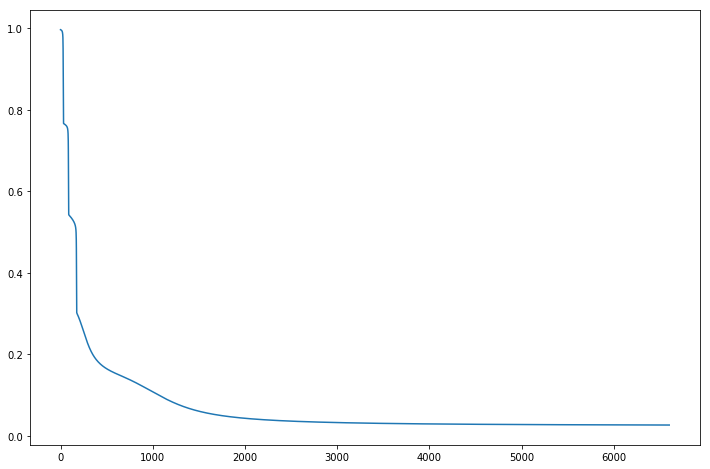

In [35]:
plt.figure(figsize=(12,8))
plt.plot(range(len(MSE) -1), MSE[1:])